# setting

In [52]:
import sys, os
home_path = os.path.expanduser("~")
sys.path.append(home_path + '/Desktop/Elo_kaggle/py/models/')
sys.path.append(home_path + '/Desktop/Elo_kaggle/py/')
sys.path.append(home_path + '/.pyenv/versions/3.6.5/lib/python3.6/site-packages/xgboost-0.81-py3.6.egg')

# module

In [68]:
import numpy as np # linear algebra
import pandas as pd # data processing
import feather # fast reading data
from datetime import datetime
from sklearn.metrics import mean_squared_error
import requests, time, base
import Regressor, Ensemble
import GradientBoosting as gb
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import StratifiedKFold, KFold
from scipy.stats import rankdata
import seaborn as sns
import matplotlib.pyplot as plt
import lightgbm as lgb
%matplotlib inline

In [69]:
import importlib
importlib.reload(base)
importlib.reload(Regressor)
importlib.reload(Ensemble)
importlib.reload(gb)

<module 'GradientBoosting' from '/Users/takutokotsubo/Desktop/Elo_kaggle/py/models/GradientBoosting.py'>

# Read data

In [ ]:
# read file sample
train, test, features, best_features, target = \
base.read_data(train_name = "train_sample",
               test_name = "test_sample",
               features_name = "features_sample",
               best_features_name = "best_features_500",
               num = 500,
               home_path = home_path)

In [72]:
# read file
train, test, features, best_features, target = \
base.read_data(train_name = "train_20190112",
               test_name = "test_20190112",
               features_name = "features_20190112",
               best_features_name = "non_outlier_features_importance",
               num = 500,
               home_path = home_path)

201917 observations and 1687 features in train set.
123623 observations and 1685 features in test set.
1683 observations and 1 features in features set.
1683 observations and 2 features in best features set.


# Regession model

In [52]:
# Ridge regression
# clf = Ridge(alpha=100)
# val_pred_ridge, test_pred_ridge = Regressor.Regressors(clf,train,test,features,target) 

# Ensemble regression (bagging)
# clf = BaggingRegressor(DecisionTreeRegressor(), n_estimators=100, max_samples=0.3)
# val_pred_bag, test_pred_bag = Regressor.Regressors(clf,train,test,features,target) 

fold n°1
fold n°2
fold n°3
fold n°4
fold n°5
fold n°1
fold n°2
fold n°3
fold n°4
fold n°5
fold n°1
fold n°2
fold n°3
fold n°4
fold n°5


In [32]:
# Lasso regression
clf = Lasso(alpha=100)
with base.timer("Lasso Regression"):
    val_pred_lasso, test_pred_lasso = Regressor.Regressors(clf,train,test,features,target) 

fold n°1
fold n°2
fold n°3
fold n°4
fold n°5


In [53]:
# print validation RMSE 
print("Ridge regression validation RMSE: %.4f" % np.sqrt(mean_squared_error(target.values, val_pred_ridge)))
print("Lasso regression validation RMSE: %.4f" % np.sqrt(mean_squared_error(target.values, val_pred_lasso)))
print("Bagging regression validation RMSE: %.4f" % np.sqrt(mean_squared_error(target.values, val_pred_bag)))  

Ridge regression validation RMSE: 4.4739
Lasso regression validation RMSE: 3.8264
Bagging regression validation RMSE: 3.8392


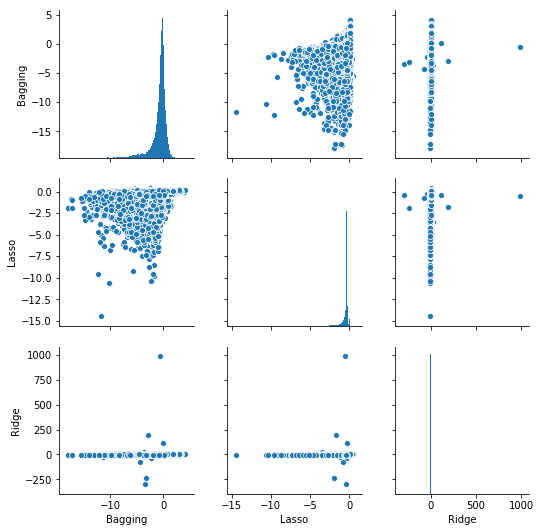

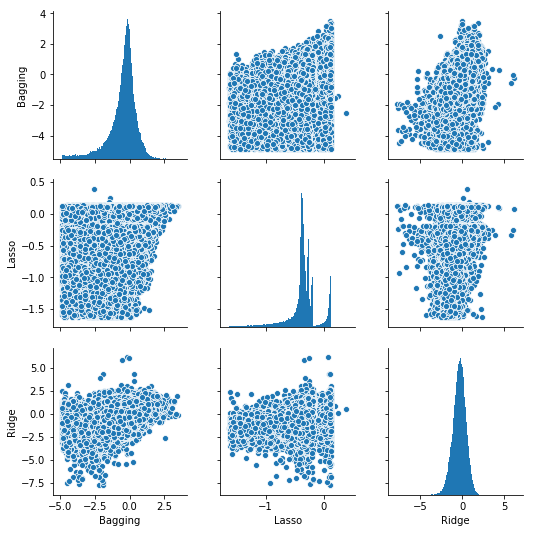

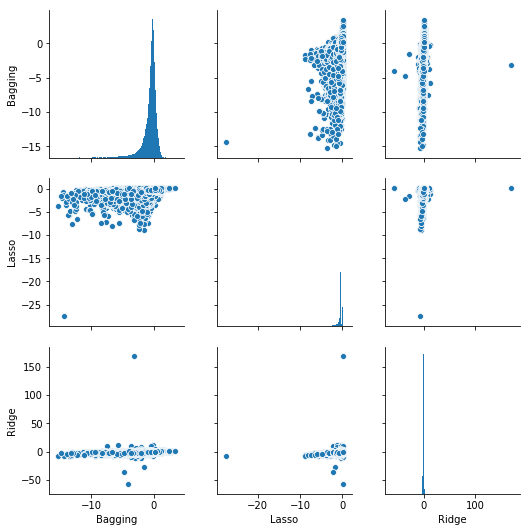

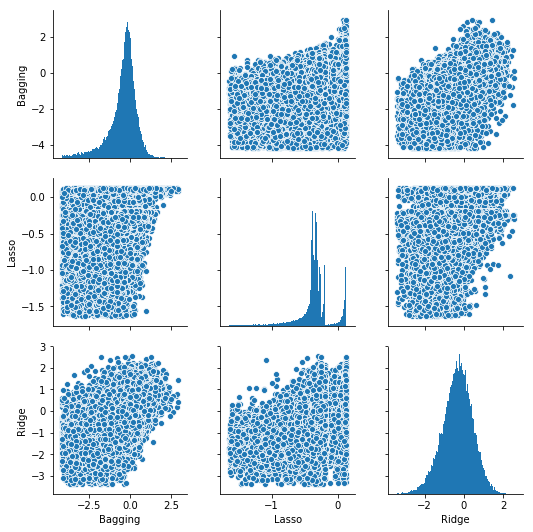

In [54]:
# set data frame
df_val = pd.DataFrame({'Ridge':val_pred_ridge, 'Lasso':val_pred_lasso, "Bagging" : val_pred_bag})
df_test = pd.DataFrame({'Ridge':test_pred_ridge, 'Lasso':test_pred_lasso, "Bagging" : test_pred_bag})
# plot validation data set 
sns.pairplot(df_val,diag_kws={'bins': 500}) # all values
sns.pairplot(df_val[df_val.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)],
             diag_kws={'bins': 500}) # non outliers
# plot test data set 
sns.pairplot(df_test,diag_kws={'bins': 500}) # all values
sns.pairplot(df_test[df_test.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)],
             diag_kws={'bins': 500}) # non outliers

In [55]:
# submit file
base.submit(test_pred_ridge,home_path=home_path,tech="Ridge")
base.submit(test_pred_lasso,home_path=home_path,tech="Lasso")
base.submit(test_pred_bag,home_path=home_path,tech="Bagging")

In [56]:
base.line("finished Regression calculation")

# Gradient Boosting method

- LightGBM
   - execute model: 単純にモデルを実行する
   - visualization model importance: 特徴量の重要度を可視化する
   - using best features: 任意の特徴量を用いて, 性能がどのように変化するか
- Xgboost

- Combine classification and regression (light gbm)

## Light GBM

### Execute model

In [19]:
# parameters
param_lgb1 = base.open_parameter(file_name = 'kernel_param_tuning_lgb', home_path = home_path)
param_lgb2 = base.open_parameter(file_name = 'kernel_param_lgb', home_path = home_path)
# validation method
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=831)
# folds = KFold(n_splits=5, shuffle=True, random_state=831)

In [26]:
# model
with base.timer("Light GBM"):
    val_pred_lgb, test_pred_lgb, lgb_importance_df = \
    gb.GradientBoosting(algorithm = gb.Lightgbm,
                        param_set = param_lgb1,
                        train = train,
                        test = test,
                        features = features,
                        target = target,
                        folds = folds)

fold n°1
Training until validation scores don't improve for 200 rounds.
[100]	training's rmse: 3.8441	valid_1's rmse: 3.84787
[200]	training's rmse: 3.84095	valid_1's rmse: 3.84547
[300]	training's rmse: 3.83878	valid_1's rmse: 3.84414
[400]	training's rmse: 3.83777	valid_1's rmse: 3.84366
[500]	training's rmse: 3.83711	valid_1's rmse: 3.84353
[600]	training's rmse: 3.83672	valid_1's rmse: 3.84359
[700]	training's rmse: 3.83643	valid_1's rmse: 3.84365
Early stopping, best iteration is:
[511]	training's rmse: 3.83706	valid_1's rmse: 3.84353
fold n°2
Training until validation scores don't improve for 200 rounds.
[100]	training's rmse: 3.84261	valid_1's rmse: 3.85321
[200]	training's rmse: 3.83937	valid_1's rmse: 3.85112
[300]	training's rmse: 3.83719	valid_1's rmse: 3.84992
[400]	training's rmse: 3.8361	valid_1's rmse: 3.84951
[500]	training's rmse: 3.83543	valid_1's rmse: 3.84943
[600]	training's rmse: 3.83502	valid_1's rmse: 3.84946
[700]	training's rmse: 3.83473	valid_1's rmse: 3.8495

In [21]:
# result
print("LIghtgbm validation RMSE: %.4f" % np.sqrt(mean_squared_error(target.values, val_pred_lgb)))
# submit
base.submit(test_pred_lgb,home_path=home_path,tech = "Lightgbm_sample")
# base.submit(test_pred_lgb,home_path=home_path,tech = "Lightgbm_feature_1683_param1")

LIghtgbm validation RMSE: 3.8424


###  Visualization

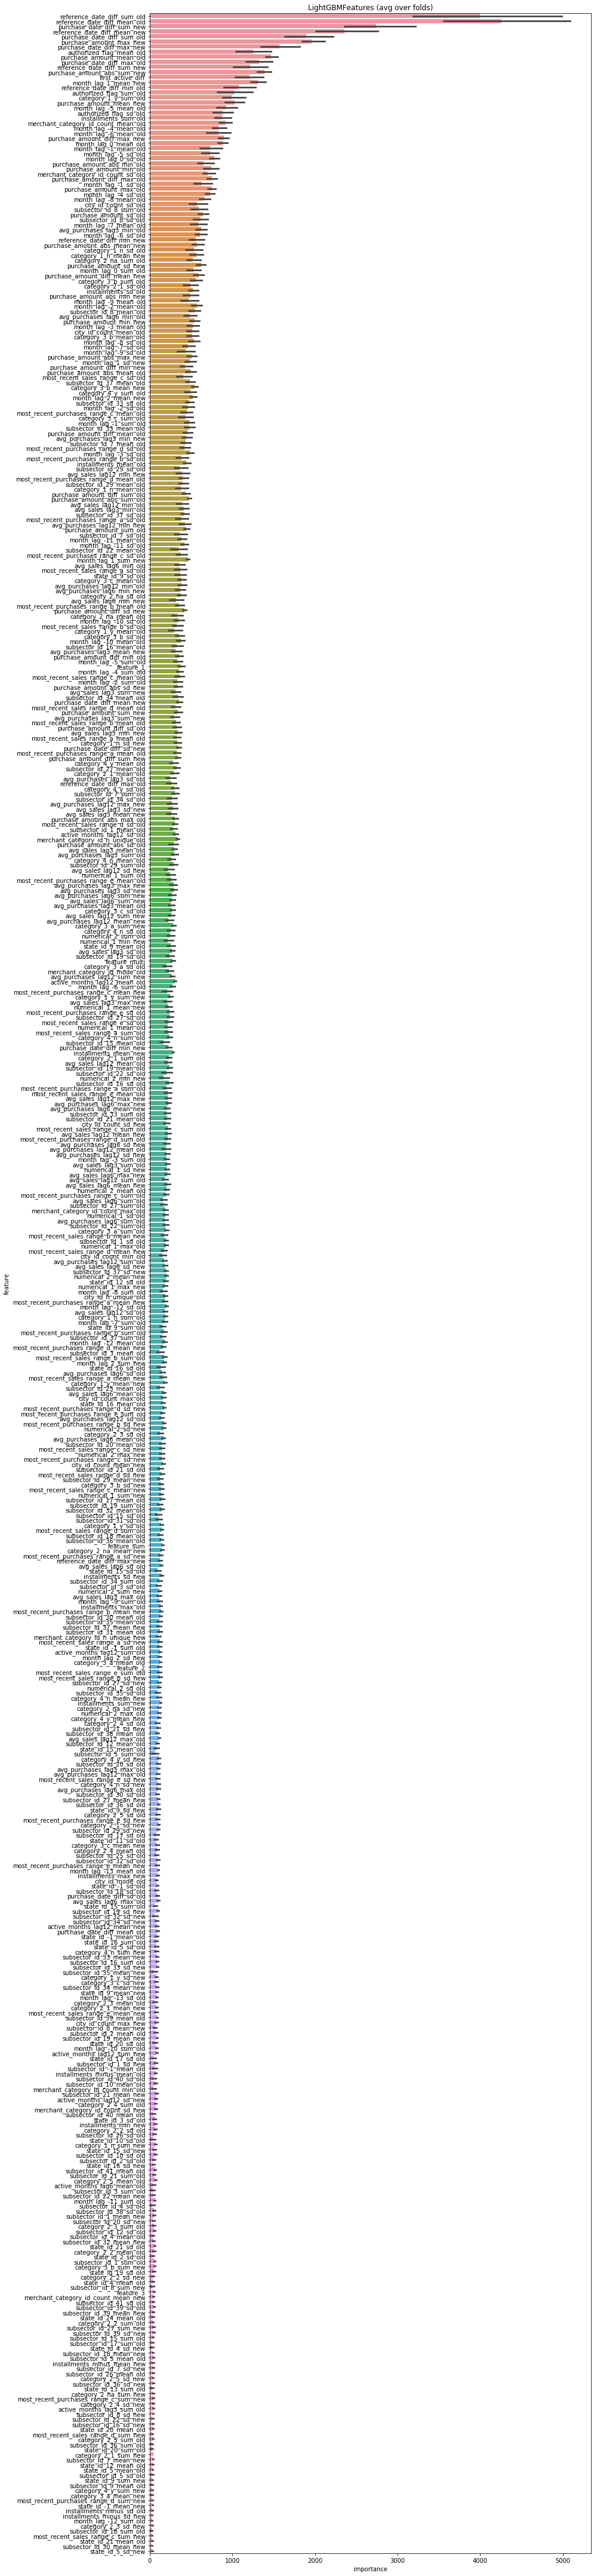

In [28]:
base.display_importances(lgb_importance_df,title="LightGBM",home_path=home_path,file_name = None)

### Extract best features

In [58]:
#extract best features
best_features = base.extract_best_features(importance_df = lgb_importance_df,
                                           num=500,
                                           home_path = home_path,
                                           file_name="best_features_500")

In [ ]:
# model
with base.timer("Light GBM"):
    val_pred_lgb, test_pred_lgb, lgb_importance_df = \
    gb.GradientBoosting(algorithm = gb.Lightgbm,
                        param_set = param_lgb1,
                        train = train,
                        test = test,
                        features = best_features,
                        target = target,
                        folds = folds)

In [46]:
# result
print("LIghtgbm validation RMSE: %.4f" % np.sqrt(mean_squared_error(target.values, val_pred_lgb)))
# submit
base.submit(test_pred_lgb,home_path=home_path,tech = "Lightgbm_best_feature_param1")

LIghtgbm validation RMSE: 3.6560


## Xgboost

In [7]:
# parameters
param_xgb1 = base.open_parameter(file_name = 'kernel_param_xgb', home_path = home_path)
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=831)

In [ ]:
# model
with base.timer("Xgboost"):
    val_pred_xgb, test_pred_xgb, xgb_importance_df \
    = gb.GradientBoosting(algorithm = gb.Xgboost_Regressor,
                          param_set = param_xgb1,
                          train = train,
                          test = test,
                          features = features,
                          target = target,
                          folds = folds)

fold n°1
[0]	train-rmse:3.94772	valid-rmse:3.95092
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 200 rounds.
[100]	train-rmse:3.56059	valid-rmse:3.79812
[200]	train-rmse:3.31366	valid-rmse:3.73311
[300]	train-rmse:3.14668	valid-rmse:3.70365
[400]	train-rmse:3.02128	valid-rmse:3.69066
[500]	train-rmse:2.92815	valid-rmse:3.68465
[600]	train-rmse:2.85235	valid-rmse:3.6807


In [1]:
# result
print("Xgboost validation RMSE: %.4f" % np.sqrt(mean_squared_error(target.values, val_pred_xgb)))
# submit
base.submit(test_pred_lgb,home_path=home_path,tech = "xgboost_feature_1037_param1")

NameError: name 'np' is not defined

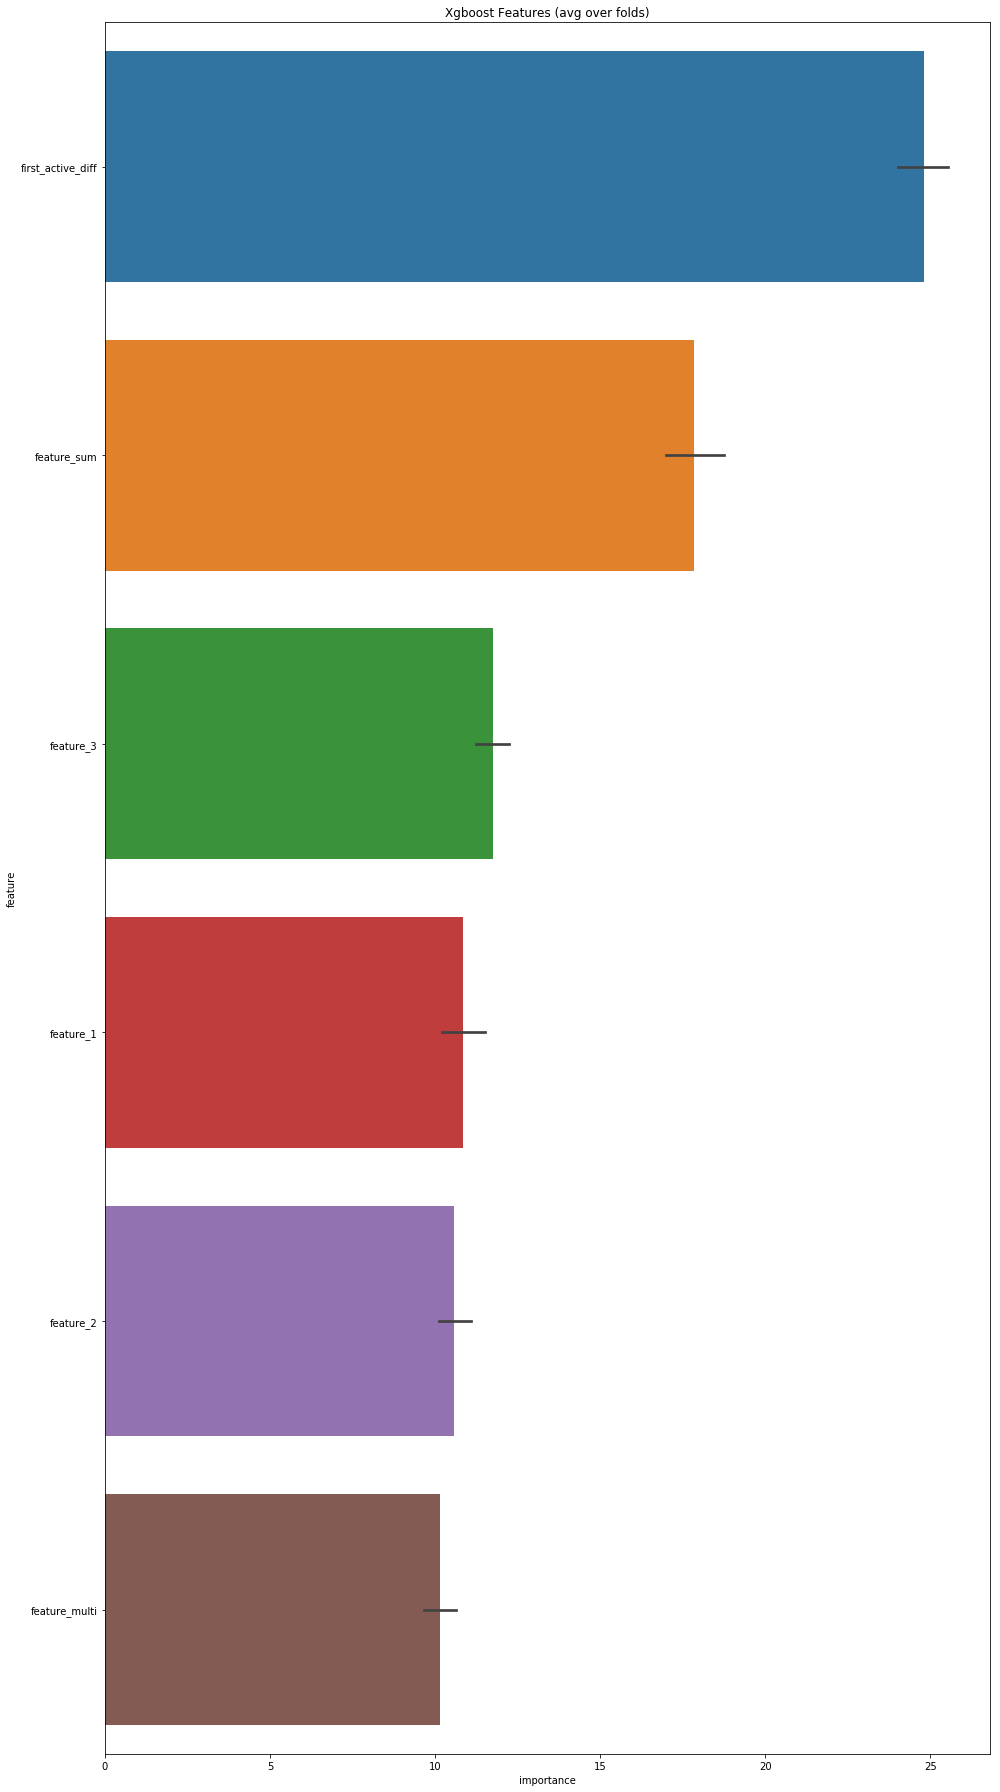

In [47]:
base.display_importances(xgb_importance_df,title="Xgboost",home_path=home_path,file_name = None)

## Combine classification and regression (light gbm)

ノーマルモデルと外れ値を除いたモデルを, 外れ値か否かの二値分類の結果をもとに組み合わせる

### Set paramters and execute model

In [7]:
# regression parameters
param_reg = base.open_parameter(file_name = 'kernel_param_tuning_lgb', home_path = home_path)
# log_loss parameters
param_loss = base.open_parameter(file_name = 'kernel_param_logloss', home_path = home_path)
# validation for regression
Sfolds = StratifiedKFold(n_splits=5, shuffle=True, random_state=831)
# validation for log_loss
Kfolds = KFold(n_splits=5, shuffle=True, random_state=831)

In [ ]:
# basic model
with base.timer("Light GBM basic regression"):
    basic_val_lgb, basic_test_lgb, basic_importance_lgb = \
    gb.GradientBoosting(algorithm = gb.Lightgbm,
                        param_set = param_reg,
                        train = train,
                        test = test,
                        features = features,
                        target = target,
                        folds = Sfolds)

fold n°1
Training until validation scores don't improve for 200 rounds.
[100]	training's rmse: 3.71783	valid_1's rmse: 3.75382
[200]	training's rmse: 3.64302	valid_1's rmse: 3.71081
[300]	training's rmse: 3.59157	valid_1's rmse: 3.68958
[400]	training's rmse: 3.5546	valid_1's rmse: 3.67842
[500]	training's rmse: 3.52716	valid_1's rmse: 3.67225
[600]	training's rmse: 3.50509	valid_1's rmse: 3.6684
[700]	training's rmse: 3.48663	valid_1's rmse: 3.66607
[800]	training's rmse: 3.47175	valid_1's rmse: 3.66463
[900]	training's rmse: 3.45764	valid_1's rmse: 3.66379
[1000]	training's rmse: 3.44605	valid_1's rmse: 3.66308
[1100]	training's rmse: 3.43402	valid_1's rmse: 3.66242
[1200]	training's rmse: 3.4225	valid_1's rmse: 3.66185
[1300]	training's rmse: 3.41164	valid_1's rmse: 3.66153
[1400]	training's rmse: 3.40058	valid_1's rmse: 3.66113
[1500]	training's rmse: 3.38963	valid_1's rmse: 3.66063
[1600]	training's rmse: 3.37866	valid_1's rmse: 3.66057
[1700]	training's rmse: 3.36891	valid_1's rm

In [ ]:
# save tmp folder
np.save(home_path + '/Desktop/Elo_kaggle/output/tmp/basic_val' + '.npy', basic_val_lgb)
np.save(home_path + '/Desktop/Elo_kaggle/output/tmp/basic_test' + '.npy', basic_test_lgb)
#extract best features
best_features = base.extract_best_features(importance_df = basic_importance_lgb,
                                           num=500,
                                           home_path = home_path,
                                           file_name="basic_features_importance")
# visualize importance
base.display_importances(importance_df = basic_importance_lgb,
                         title = "LightGBM basic model",
                         home_path = home_path,
                         file_name = "basic_best_features_500")

In [10]:
# Exclusive outlier model
with base.timer("Light GBM outlier regression"):
    non_outlier_val_lgb, non_outlier_test_lgb, non_outlier_importance_lgb = \
    gb.GradientBoosting(algorithm = gb.Lightgbm,
                        param_set = param_reg,
                        train = train[train["target_class"] == 0],
                        test = test,
                        features = features,
                        target = target[train["target_class"] == 0],
                        folds = Sfolds)

fold n°1
Training until validation scores don't improve for 200 rounds.
[100]	training's rmse: 1.62857	valid_1's rmse: 1.63186
[200]	training's rmse: 1.58418	valid_1's rmse: 1.59406
[300]	training's rmse: 1.5584	valid_1's rmse: 1.57565
[400]	training's rmse: 1.54077	valid_1's rmse: 1.56563
[500]	training's rmse: 1.52718	valid_1's rmse: 1.55971
[600]	training's rmse: 1.51593	valid_1's rmse: 1.55599
[700]	training's rmse: 1.50594	valid_1's rmse: 1.55343
[800]	training's rmse: 1.49735	valid_1's rmse: 1.55156
[900]	training's rmse: 1.48963	valid_1's rmse: 1.55021
[1000]	training's rmse: 1.48302	valid_1's rmse: 1.54928
[1100]	training's rmse: 1.47734	valid_1's rmse: 1.54853
[1200]	training's rmse: 1.47189	valid_1's rmse: 1.548
[1300]	training's rmse: 1.46698	valid_1's rmse: 1.54756
[1400]	training's rmse: 1.46256	valid_1's rmse: 1.54712
[1500]	training's rmse: 1.45839	valid_1's rmse: 1.54686
[1600]	training's rmse: 1.45414	valid_1's rmse: 1.5467
[1700]	training's rmse: 1.45018	valid_1's rms

[2400]	training's rmse: 1.42276	valid_1's rmse: 1.55838
[2500]	training's rmse: 1.41943	valid_1's rmse: 1.55845
Early stopping, best iteration is:
[2393]	training's rmse: 1.423	valid_1's rmse: 1.55837


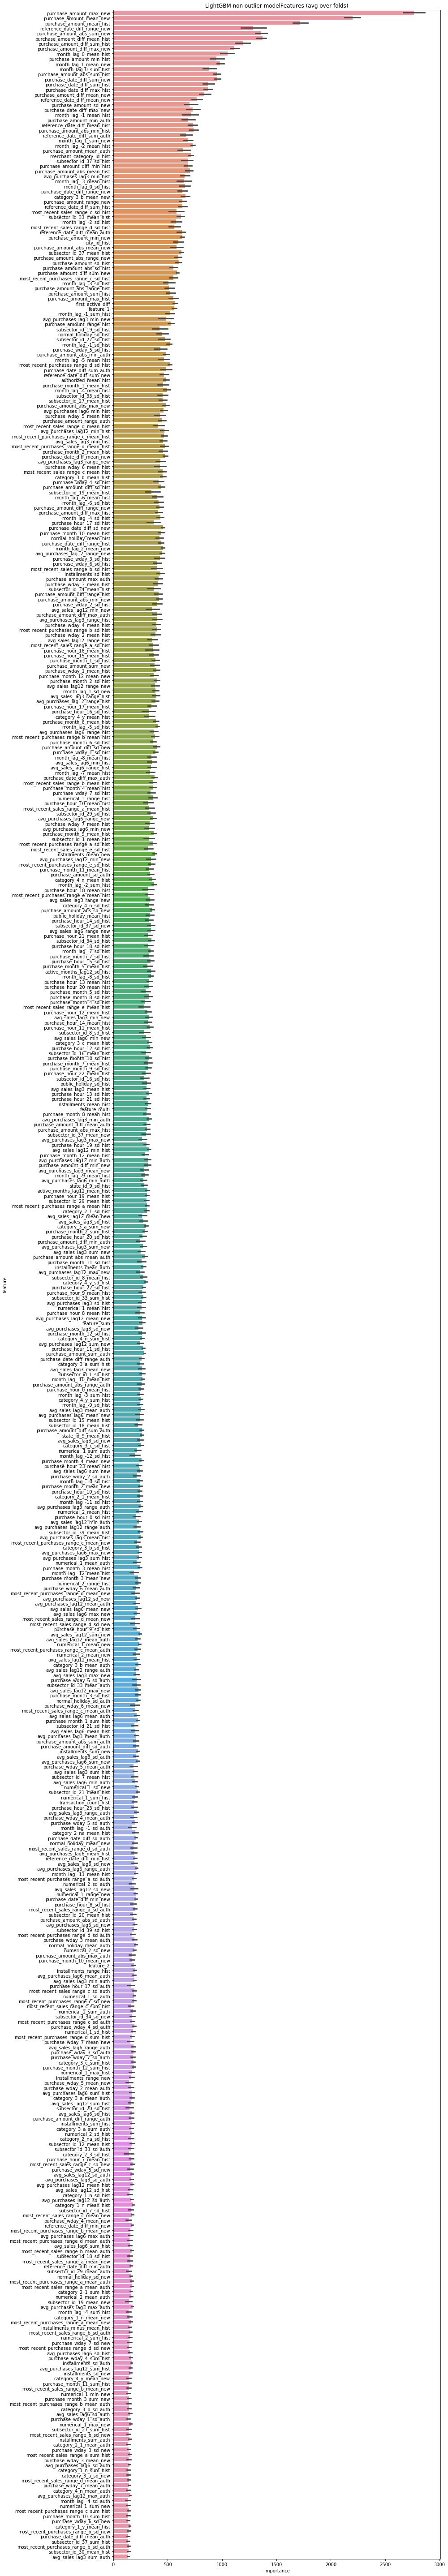

In [71]:
# save tmp folder
np.save(home_path + '/Desktop/Elo_kaggle/output/tmp/non_outlier_val' + '.npy', non_outlier_val_lgb)
np.save(home_path + '/Desktop/Elo_kaggle/output/tmp/non_outlier_test' + '.npy', non_outlier_test_lgb)
# remove memory save
# import gc
# del non_outlier_val_lgb
# del non_outlier_test_lgb
# gc.collect()
#extract best features
best_features = base.extract_best_features(importance_df = non_outlier_importance_lgb,
                                           num=500,
                                           home_path = home_path,
                                           file_name="non_outlier_features_importance")
# visualize importance
base.display_importances(importance_df = non_outlier_importance_lgb,
                         title = "LightGBM non outlier model",
                         home_path = home_path,
                         file_name = "non_outlier_best_features_500")

In [ ]:
# Training Model For Outliers Classification
with base.timer("Light GBM outlier clssigication"):
    class_val_lgb, class_test_lgb, class_importance_lgb = \
    gb.GradientBoosting(algorithm = gb.Lightgbm,
                        param_set = param_loss,
                        train = train,
                        test = test,
                        features = features,
                        target = train["target_class"],
                        folds = Kfolds)

In [ ]:
# save tmp folder
np.save(home_path + '/Desktop/Elo_kaggle/output/tmp/class_val' + '.npy', class_val_lgb)
np.save(home_path + '/Desktop/Elo_kaggle/output/tmp/class_test' + '.npy', class_test_lgb)
#extract best features
best_features = base.extract_best_features(importance_df = class_importance_lgb,
                                           num=500,
                                           home_path = home_path,
                                           file_name="classification_features_importance")
# visualize importance
base.display_importances(importance_df = class_importance_lgb,
                         title = "LightGBM classification model",
                         home_path = home_path,
                         file_name = "classification_best_features_500")

### Combine validation data and submit test data

In [ ]:
# load tmp data
basic_val_lgb = np.load(home_path + '/Desktop/Elo_kaggle/output/tmp/basic_val' + '.npy')
basic_test_lgb = np.load(home_path + '/Desktop/Elo_kaggle/output/tmp/basic_test' + '.npy')
non_outlier_val_lgb = np.load(home_path + '/Desktop/Elo_kaggle/output/tmp/non_outlier_val' + '.npy')
non_outlier_test_lgb = np.load(home_path + '/Desktop/Elo_kaggle/output/tmp/non_outlier_test' + '.npy')
class_val_lgb = np.load(home_path + '/Desktop/Elo_kaggle/output/tmp/class_val' + '.npy')
class_test_lgb = np.load(home_path + '/Desktop/Elo_kaggle/output/tmp/class_test' + '.npy')

In [66]:
# basic validation result
print("LIghtgbm basic validation RMSE: %.4f" % np.sqrt(mean_squared_error(target.values, basic_val_lgb)))
# combine validation
combine_val = basic_val_lgb.copy()
combine_val[train["target_class"] == 0] = non_outlier_val_lgb
print("LIghtgbm combine validation RMSE: %.4f" % np.sqrt(mean_squared_error(target.values, combine_val)))

LIghtgbm validation RMSE: 3.8424
LIghtgbm validation RMSE: 3.8189


In [88]:
# extract outlier index ( big 10000 value index)
outlier_idx = rankdata(class_test_lgb, method='ordinal') > (len(class_test_lgb) - 10000)
# combine test data
combine_test = non_outlier_test_lgb.copy()
combine_test[outlier_idx] = basic_test_lgb[outlier_idx]

In [98]:
# submit 3 patterns
base.submit(basic_test_lgb,home_path=home_path,tech = "Lightgbm_basic_model")
base.submit(non_outlier_test_lgb,home_path=home_path,tech = "Lightgbm_nonoutlier_model")
base.submit(combine_test,home_path=home_path,tech = "Lightgbm_combine_model")

# Ensemble

Ensemble.pyは作業が進み次第記入する.

In [57]:
# data set 
train_stack = np.vstack([val_pred_lasso,val_pred_bag,val_pred_lgb, val_pred_xgb]).transpose()
test_stack = np.vstack([test_pred_lasso,test_pred_bag,test_pred_lgb, test_pred_xgb]).transpose()

In [58]:
# Ridge regression
clf = Ridge(alpha=100)
val_pred_ensemble, test_pred_ensemble = Ensemble.Ensembles(clf,train_stack,test_stack,train,target) 

fold n°1
fold n°2
fold n°3
fold n°4
fold n°5


In [60]:
# result
print("Ensemble validation RMSE: %.4f" % np.sqrt(mean_squared_error(target.values, val_pred_ensemble)))
# submit
base.submit(test_pred_ensemble,home_path=home_path,tech="lasso-bagging-lgb-xgb-stack")

Ensemble validation RMSE: 3.6567
